# cài thư viện

In [ ]:
!pip install matplotlib opencv-python

# Import thư viện

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh

(-0.5, 494.5, 388.5, -0.5)

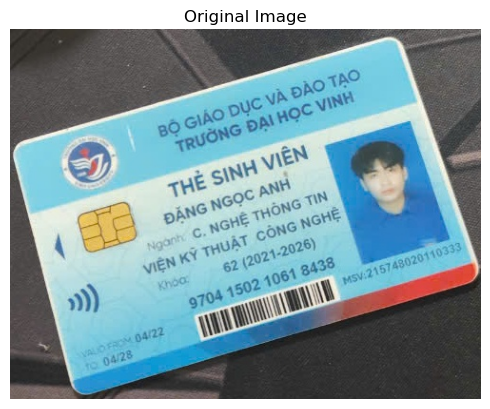

In [134]:
# image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_1.jpg"
# image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_2.jpg"
image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_3.jpg"
# image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_4.jpg"
image=cv2.imread(image_path)
# plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Làm xám ảnh

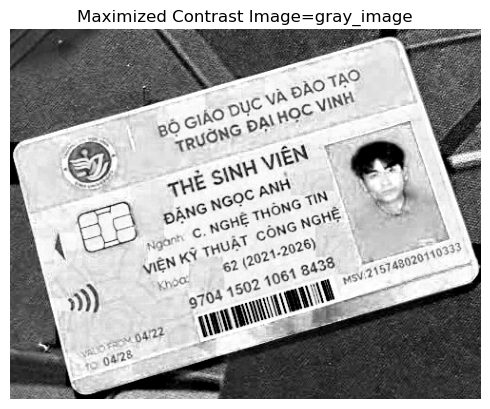

In [137]:
def extractValue(image):
    height, width, numChannels = image.shape
    imgHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    imgHue, imgSaturation, imgValue = cv2.split(imgHSV)
    return imgValue

def maximizeContrast(imgGrayscale):
    height, width = imgGrayscale.shape

    structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Tạo kernel 3x3
    
    imgTopHat = cv2.morphologyEx(imgGrayscale, cv2.MORPH_TOPHAT, structuringElement, iterations=10)  # Nổi bật chi tiết sáng
    imgBlackHat = cv2.morphologyEx(imgGrayscale, cv2.MORPH_BLACKHAT, structuringElement, iterations=10)  # Nổi bật chi tiết tối
    
    imgGrayscalePlusTopHat = cv2.add(imgGrayscale, imgTopHat) 
    imgGrayscalePlusTopHatMinusBlackHat = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

    return imgGrayscalePlusTopHatMinusBlackHat

imgGrayscale = extractValue(image)

imgMaxContrastGrayscale = maximizeContrast(imgGrayscale)
gray_image=imgMaxContrastGrayscale

plt.imshow(gray_image, cmap='gray')
plt.title('Maximized Contrast Image=gray_image')
plt.axis('off')
plt.show()

# Tăng độ tương phản bằng CLAHE (Adaptive Histogram Equalization)

(-0.5, 494.5, 388.5, -0.5)

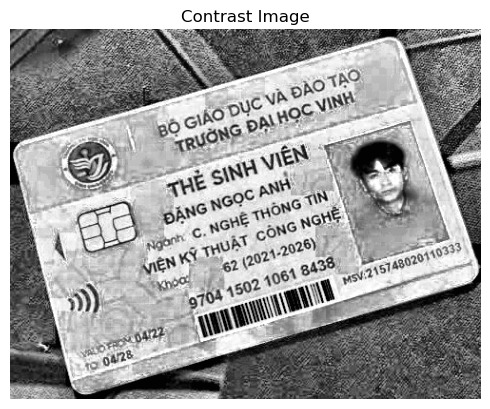

In [140]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_image = clahe.apply(gray_image)

# plt.subplot(3, 3, 3)
plt.imshow(contrast_image, cmap='gray')
plt.title('Contrast Image')
plt.axis('off')

# Giảm nhiễu bằng bộ lọc Gauss

(-0.5, 494.5, 388.5, -0.5)

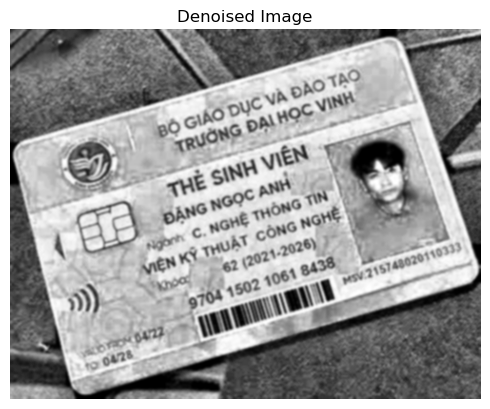

In [142]:
denoised_image = cv2.GaussianBlur(contrast_image, (5, 5), 0)

# plt.subplot(3, 3, 4)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

# Nhị phân hoá ảnh với ngưỡng động (Adaptive Thresholding)

(-0.5, 494.5, 388.5, -0.5)

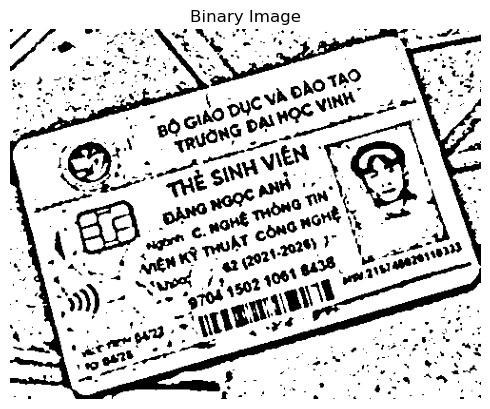

In [160]:
#binary_image = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
binary_image = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 19, 19)

# plt.subplot(3, 3, 5)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

(-0.5, 494.5, 388.5, -0.5)

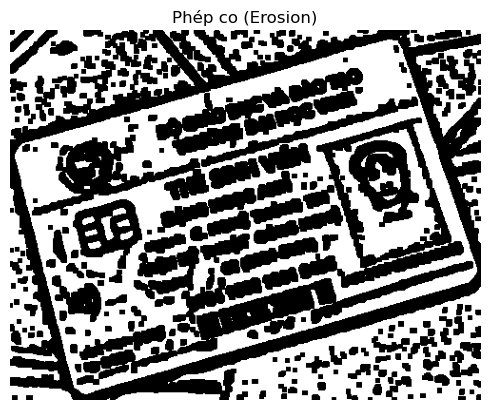

In [162]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(binary_image,kernel,iterations = 1)

plt.imshow(erosion, cmap='gray')
plt.title('Phép co (Erosion)')
plt.axis('off')

(-0.5, 494.5, 388.5, -0.5)

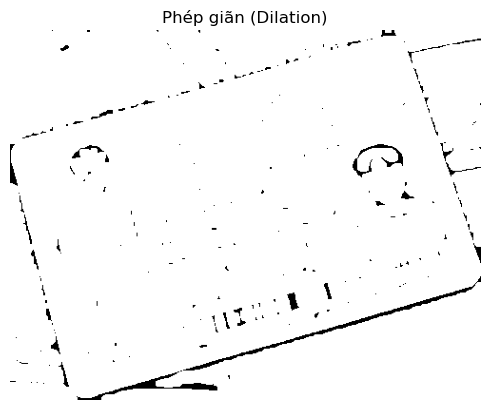

In [164]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(binary_image,kernel,iterations = 1)

plt.imshow(dilation, cmap='gray')
plt.title('Phép giãn (Dilation)')
plt.axis('off')

(-0.5, 494.5, 388.5, -0.5)

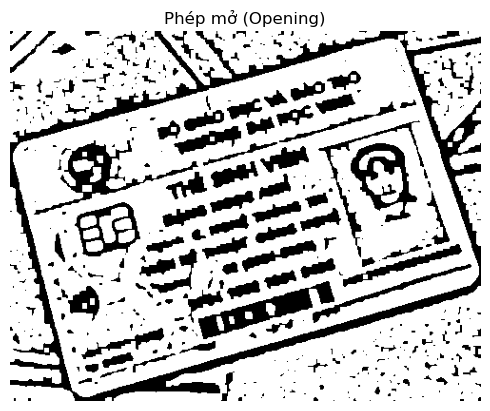

In [165]:
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap='gray')
plt.title('Phép mở (Opening)')
plt.axis('off')

(-0.5, 494.5, 388.5, -0.5)

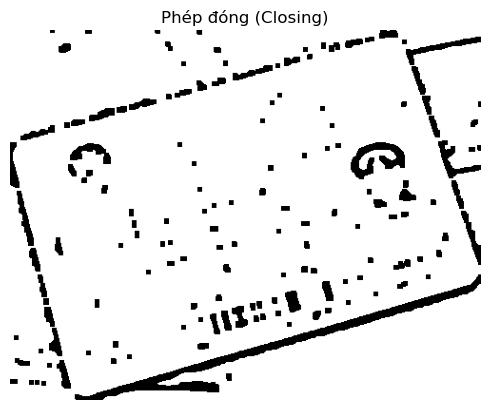

In [168]:
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')
plt.title('Phép đóng (Closing)')
plt.axis('off')

# Phát hiện cạnh với biên Canny

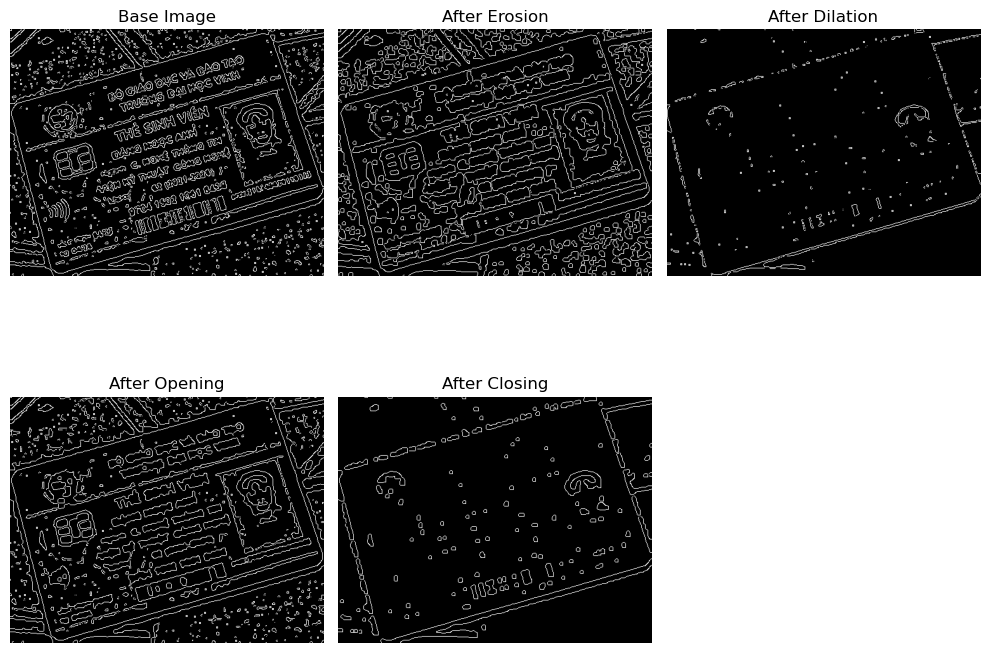

In [171]:
# Tính toán edges cho từng ảnh
edges_base = cv2.Canny(binary_image, threshold1=150, threshold2=255)
edges_erosion = cv2.Canny(erosion, threshold1=150, threshold2=255)
edges_dilation = cv2.Canny(dilation, threshold1=150, threshold2=255)
edges_opening = cv2.Canny(opening, threshold1=150, threshold2=255)
edges_closing = cv2.Canny(closing, threshold1=150, threshold2=255)

# Tạo biểu đồ để hiển thị tất cả ảnh
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(edges_base, cmap='gray')
plt.title('Base Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edges_erosion, cmap='gray')
plt.title('After Erosion')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(edges_dilation, cmap='gray')
plt.title('After Dilation')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(edges_opening, cmap='gray')
plt.title('After Opening')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(edges_closing, cmap='gray')
plt.title('After Closing')
plt.axis('off')

plt.tight_layout()
plt.show()

# Tìm và lọc kết quả thẻ sinh viên bằng Contour

Góc nghiêng: 16.15°


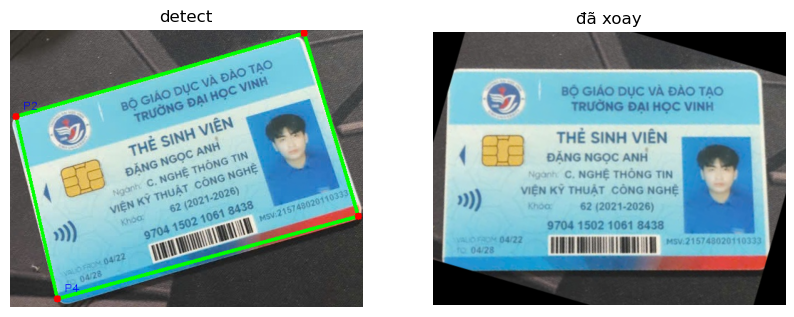

In [205]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(edges_erosion, kernel, iterations=1)

contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

screenCnt = []
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    if len(approx) == 4:
        screenCnt.append(approx)

if len(screenCnt) == 0:
    detected = 0
    print("No card detected")
else:
    detected = 1

if detected == 1:
    contour_image = image.copy()

    for cnt in screenCnt:
        cv2.drawContours(contour_image, [cnt], -1, (0, 255, 0), 3)

        points = cnt.reshape(4, 2)
        sorted_points = sorted(points, key=lambda x: (x[1], x[0]))

        for i, (x, y) in enumerate(sorted_points):
            cv2.circle(contour_image, (x, y), 5, (0, 0, 255), -1)
            cv2.putText(contour_image, f'P{i+1}', (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

        (x1, y1), (x2, y2) = sorted_points[0], sorted_points[1]
        doi = abs(y1 - y2)
        ke = abs(x1 - x2)
        angle = math.atan(doi / ke) * (180.0 / math.pi)
        print(f"Góc nghiêng: {angle:.2f}°")

        mask = np.zeros(contour_image.shape[:2], np.uint8)
        mark_image=cv2.drawContours(mask, [cnt], 0, 255, -1)

        (x, y) = np.where(mark_image == 255)
        (topx, topy) = (np.min(x), np.min(y))
        (bottomx, bottomy) = (np.max(x), np.max(y))

        roi = image[topx:bottomx, topy:bottomy]

        h, w = roi.shape[:2]
        center = (w // 2, h // 2)

        if x1 > x2:
            rotationMatrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
        else:
            rotationMatrix = cv2.getRotationMatrix2D(center, angle, 1.0)

        roi_rotated = cv2.warpAffine(roi, rotationMatrix, (width, height))
        roi_resized = cv2.resize(roi_rotated, (0, 0), fx=3, fy=3)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
        plt.title("detect")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(roi_resized, cv2.COLOR_BGR2RGB))
        plt.title("đã xoay")
        plt.axis("off")

        plt.show()
        break


# Toàn bộ chương trình

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc ảnh
image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped.jpg"
image=cv2.imread(image_path)

# 2. Làm xám ảnh
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Tăng độ tương phản bằng CLAHE (Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_image = clahe.apply(gray_image)

# 4. Giảm nhiễu bằng bộ lọc Gauss
denoised_image = cv2.GaussianBlur(contrast_image, (5, 5), 0)

# 5. Nhị phân hoá ảnh với ngưỡng động (Adaptive Thresholding)
binary_image = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# 6. Phát hiện cạnh với biên Canny
edges = cv2.Canny(binary_image, threshold1=50, threshold2=150)

# 7. Tìm và lọc kết quả thẻ sinh viên bằng Contour
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Lọc các contour có diện tích lớn để tìm thẻ sinh viên
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

# Vẽ contour lên ảnh gốc để xem kết quả
contour_image = image.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (0, 255, 0), 3)

# Hiển thị kết quả từng bước
plt.figure(figsize=(12, 12))

# 1. Ảnh gốc
plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# 2. Ảnh xám
plt.subplot(3, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

# 3. Ảnh tăng độ tương phản
plt.subplot(3, 3, 3)
plt.imshow(contrast_image, cmap='gray')
plt.title('Contrast Image')
plt.axis('off')

# 4. Ảnh giảm nhiễu
plt.subplot(3, 3, 4)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

# 5. Ảnh nhị phân hoá
plt.subplot(3, 3, 5)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# 6. Canny Edge Detection
plt.subplot(3, 3, 6)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

# 7. Kết quả Contour
plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_1.jpg"
image=cv2.imread(image_path)

# Chuyển sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Làm mờ ảnh để giảm nhiễu
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Phát hiện cạnh bằng Canny
edges = cv2.Canny(blurred, 50, 150)

# Tìm các đường thẳng trong ảnh bằng Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

# Tạo một bản sao ảnh để vẽ kết quả
line_image = image.copy()

# Vẽ các đường thẳng lên ảnh
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hiển thị các đường thẳng phát hiện được
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines Using Hough Transform')
plt.axis('off')
plt.show()

# Bước tiếp theo: Phát hiện các góc vuông và tìm 4 điểm của hình chữ nhật (sử dụng phương pháp tự chọn).
# Sau đó, bạn có thể áp dụng Perspective Transform để cắt thẻ sinh viên nếu phát hiện 4 góc vuông.

